# HALS Example

Load all the packages required to run this example

In [14]:
import os
from matplotlib import pyplot as plt
from matplotlib import gridspec
from matplotlib.patches import Rectangle
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import random

plt.style.use('ggplot')
myColor  = ("#E3072A","#0A8974","#5FAECC","#E49C23","#E27520") # Darjeeling Color map

Import the HALS methods

In [2]:
import HALS as hals

Specify the target constituents for the HALS analysis

In [3]:
# Earth tide frequencies
et_fqs = {'Q1': 0.893244, 'O1': 0.929536, 'M1': 0.966446, 'P1': 0.997262, 'S1': 1.0, 'K1': 1.002738, 'N2': 1.895982, 'M2': 1.932274, 'S2': 2.0, 'K2': 2.005476}
# Atmospheric tide frquencies
at_fqs = {'P1': 0.997262, 'S1': 1.0, 'K1': 1.002738, 'S2': 2.0, 'K2': 2.005476}

Load the example data set from baldry

In [4]:
folder = "test_data"
file = "baldry"

raw_data = pd.read_csv(folder + '/' + file + '_data.csv')
raw_data.iloc[0]

Datetime               24/10/2003 01:00
Tide [nm/s**2]                 -1123.11
Atm. pressure [kPa]             966.955
BH1 [mAHD]                      452.787
BH2 [mAHD]                      453.287
BH3 [mAHD]                      453.055
BH4 [mAHD]                      451.887
BH5 [mAHD]                      456.607
Name: 0, dtype: object

Create datetime column and convert it to a numeric

In [5]:
# search for a datetime column
dt_col = raw_data.columns[raw_data.columns.str.contains('datetime', case=False)][0]
# streamline the column format
raw_data[dt_col] = pd.to_datetime(raw_data[dt_col],dayfirst=True)

# create a numeric value column
dnum_col = pd.to_numeric(raw_data[dt_col])
dnum_col = (dnum_col-dnum_col[0])
dnum_col = dnum_col/ 10**9 # from ns to seconds
dnum_col = dnum_col/(60*60*24) # to days

raw_data.insert(0,"dnum",dnum_col)
raw_data.dnum

0            0.000000
1            0.041667
2            0.083333
3            0.125000
4            0.166667
             ...     
107943    4497.625000
107944    4497.666667
107945    4497.708333
107946    4497.750000
107947    4497.791667
Name: dnum, Length: 107948, dtype: float64

Select the Groundwater head measurement data to be analysed

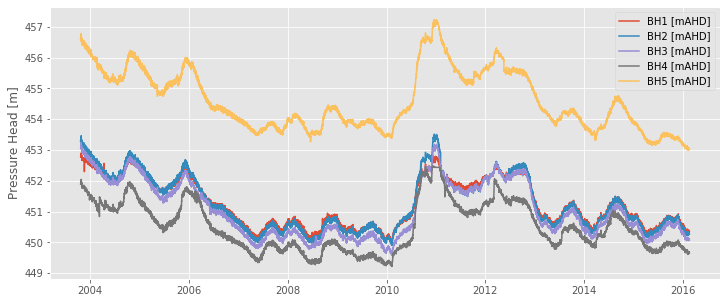

In [6]:
gw_col = list(raw_data.columns[raw_data.columns.str.contains('BH', case=False)])

fig, ax = plt.subplots(nrows= 1,figsize=(12.0,5.0), sharex = True) # ,sharey=True
for name,i in zip(gw_col,range(len(gw_col))):
    gw = raw_data[name]
    # Groundwater Head Measurements    
    ax.plot(raw_data[dt_col],gw,label=name)
    ax.set_ylabel("Pressure Head [m]")
    ax.legend(loc="upper right")

Add gaps to the data set to make it non-uniformly sampled

In [7]:
# remove 20% of all values
k = 0.2

# create list of gaps
gaps = random.sample(list(raw_data.index), int(len(raw_data)*k))

# drop the gap indices in the original data
df_gaps = raw_data.drop(raw_data.index[gaps]).reset_index(drop=True)

Add missing values to the data set (np.nan)

In [8]:
# replace 20% of all values by NaN
k = 0.3

# create list of missing values
for name,i in zip(gw_col,range(len(gw_col))):
    gw = raw_data[name]
    nans = random.sample(list(df_gaps.index), int(len(df_gaps)*k))
    df_gaps.loc[nans,name] = np.nan
    count = len(df_gaps[np.isnan(df_gaps.loc[:,name])])
    print("Number of missing values in",name, " = ",count)
    #print(len(df_gaps))
    print("Number of values in",name, " = ",len(df_gaps)-count)
df_gaps

Number of missing values in BH1 [mAHD]  =  25907
Number of values in BH1 [mAHD]  =  60452
Number of missing values in BH2 [mAHD]  =  25907
Number of values in BH2 [mAHD]  =  60452
Number of missing values in BH3 [mAHD]  =  25907
Number of values in BH3 [mAHD]  =  60452
Number of missing values in BH4 [mAHD]  =  25907
Number of values in BH4 [mAHD]  =  60452
Number of missing values in BH5 [mAHD]  =  25907
Number of values in BH5 [mAHD]  =  60452


,dnum,Datetime,Tide [nm/s**2],Atm. pressure [kPa],BH1 [mAHD],BH2 [mAHD],BH3 [mAHD],BH4 [mAHD],BH5 [mAHD]
0,0.041667,2003-10-24 02:00:00,-1004.169326,966.005650,452.787,NaN,NaN,NaN,456.607
1,0.083333,2003-10-24 03:00:00,-667.044414,966.005650,452.797,NaN,NaN,451.887,NaN
2,0.125000,2003-10-24 04:00:00,-198.503788,965.056725,NaN,453.307,453.055,451.897,NaN
3,0.166667,2003-10-24 05:00:00,283.323118,964.107800,452.807,NaN,NaN,451.897,NaN
4,0.208333,2003-10-24 06:00:00,660.284518,964.107800,452.807,453.317,453.085,NaN,456.617
...,...,...,...,...,...,...,...,...,...
86354,4497.458333,2016-02-15 12:00:00,459.657547,961.450810,NaN,450.267,450.095,449.667,NaN
86355,4497.541667,2016-02-15 14:00:00,464.802470,960.786562,450.347,NaN,450.095,449.667,453.027
86356,4497.625000,2016-02-15 16:00:00,138.277946,960.596778,NaN,NaN,NaN,449.667,453.027
86357,4497.666667,2016-02-15 17:00:00,-105.908901,960.596778,450.347,NaN,450.095,449.667,453.027


Only select a subset of the data in order to better visualize the gaps

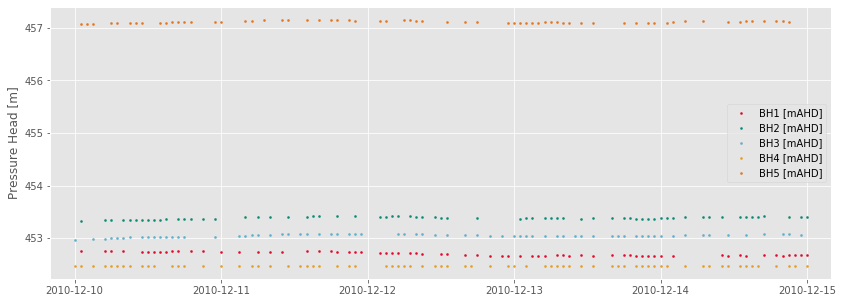

In [9]:
start = pd.to_datetime('2010-12-10 00:00')
stop  = pd.to_datetime('2010-12-15 00:00')
offset = pd.Timedelta(4, unit='h')
idx   = ((df_gaps["Datetime"] >= start) & (df_gaps["Datetime"] <= stop))

data  = df_gaps.loc[idx].reset_index(drop=True)
fig, ax = plt.subplots(nrows= 1 ,figsize=(14.0,5.0)) # ,sharey=True
for name,i in zip(gw_col,range(len(gw_col))):
    gw = data[name]
    # Groundwater Head Measurements    
    #ax.plot(data[dt_col],gw,label=name,color=myColor[i],lw=2.0)
    ax.scatter(data[dt_col],gw,label=name,color=myColor[i],s=4.0)
ax.set_ylabel("Pressure Head [m]")
ax.set_xlim(start-offset,stop+offset)
ax.legend()

Detrend the data with the overlapping window function

,dnum,BH1 [mAHD],BH2 [mAHD],BH3 [mAHD],BH4 [mAHD],BH5 [mAHD]
0,0.041667,-0.012357,0.000000,0.000000,0.000000,0.001357
1,0.083333,-0.002345,0.000000,0.000000,-0.010841,0.000000
2,0.125000,0.000000,0.000794,-0.012028,-0.001567,0.000000
3,0.166667,0.007679,0.000000,0.000000,-0.002293,0.000000
4,0.208333,0.007691,0.011946,0.017202,0.000000,0.012205
...,...,...,...,...,...,...
86354,4497.458333,0.000000,-0.011329,-0.002779,-0.002192,0.000000
86355,4497.541667,-0.003856,0.000000,-0.000784,-0.000343,-0.002317
86356,4497.625000,0.000000,0.000000,0.000000,0.000145,-0.001438
86357,4497.666667,-0.002183,0.000000,-0.000114,0.000389,-0.000998


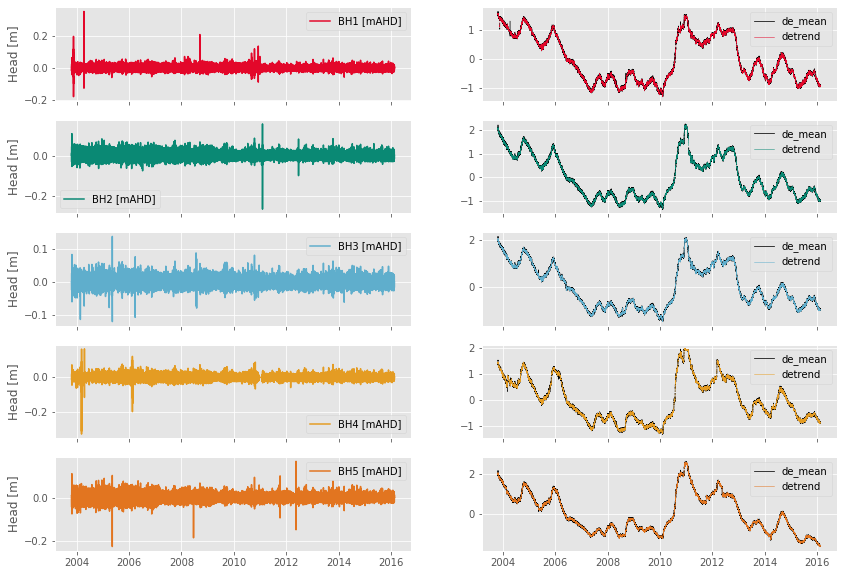

In [10]:
length = 3.0 # length of the detrend window
stopper = 3 # minimum number of samples in window
n_ovrlp = 5 # number of window overlaps

fig, ax = plt.subplots(nrows= len(gw_col),ncols=2,figsize=(14.0,10.0), sharex = True) # ,sharey=True
# create a new dataframe for the detrended data
df_detr = pd.DataFrame(df_gaps.dnum,columns = ["dnum"])
for name,i in zip(gw_col,range(len(gw_col))):
    gw = df_gaps[name]
    # detrending of the data
    df_detr[name] = hals.lin_window_ovrlp(df_gaps.dnum, gw.values,length=length,stopper=stopper,n_ovrlp=n_ovrlp)
    ax[i,0].plot(df_gaps[dt_col],df_detr[name], label = name, color=myColor[i])
    ax[i,0].legend()
    ax[i,0].set_ylabel("Head [m]")
    de_mean = gw.values - np.nanmean(gw.values)
    ax[i,1].plot(df_gaps[dt_col], de_mean, label='de_mean', lw=0.75,color="black")
    ax[i,1].plot(df_gaps[dt_col], de_mean - df_detr[name], label='detrend', lw=0.5, color=myColor[i])
    ax[i,1].legend(loc="upper right")
df_detr    

Apply HALS to extract the tidal constituent properties from the detrended data

In [11]:
# merge earth and atmospheric tide dictionaries
freqs = {**et_fqs, **at_fqs}

# create new dataframes for the amplitude and phase results
df_A = pd.DataFrame.from_dict(freqs,orient="index",columns=["freqs"])
df_phi = pd.DataFrame.from_dict(freqs,orient="index",columns=["freqs"])

# loop over the groundwater head measurement data sets
for name,i in zip(gw_col,range(len(gw_col))):
    gw = df_detr[name]
    #HALS function
    output = hals.hals_lsq(df_detr.dnum.values, gw.values, list(freqs.values()))
    df_A[name] = output[0] #Amplitudes
    df_phi[name] = output[1] #Phases
    
df_A    

Conditioning number:  1.4349344745116157
Conditioning number:  1.4349344745116157
Conditioning number:  1.4349344745116157
Conditioning number:  1.4349344745116157
Conditioning number:  1.4349344745116157


,freqs,BH1 [mAHD],BH2 [mAHD],BH3 [mAHD],BH4 [mAHD],BH5 [mAHD]
Q1,0.893244,0.000120,0.000053,0.000029,0.000094,0.000033
O1,0.929536,0.000192,0.000249,0.000391,0.000110,0.000137
M1,0.966446,0.000106,0.000067,0.000091,0.000018,0.000095
P1,0.997262,0.000730,0.001414,0.000941,0.000914,0.001277
S1,1.000000,0.005019,0.007001,0.005044,0.004301,0.006580
K1,1.002738,0.000642,0.001506,0.000956,0.000864,0.001384
N2,1.895982,0.000055,0.000100,0.000074,0.000060,0.000045
M2,1.932274,0.000436,0.000700,0.000778,0.000362,0.000451
S2,2.000000,0.003699,0.005827,0.003296,0.004719,0.006013
K2,2.005476,0.000304,0.000516,0.000342,0.000426,0.000539


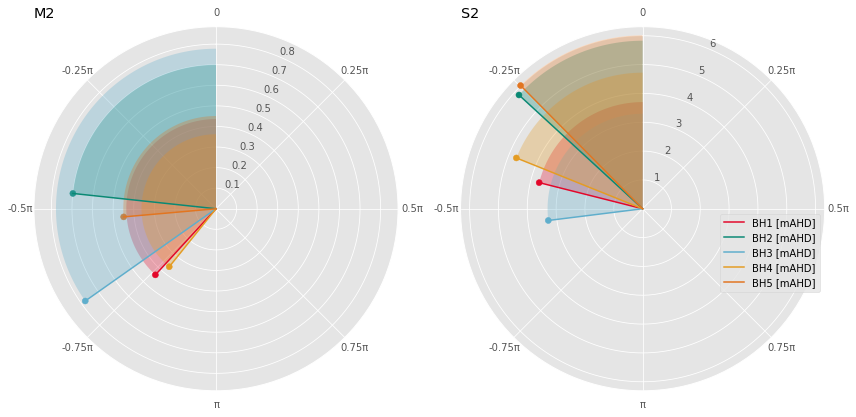

In [24]:
target = ["M2","S2"]
df_A = df_A.loc[target,gw_col]
df_phi = df_phi.loc[target,gw_col]

def radian_function(x, pos =None):
    # the function formatter sends
    rad_x = x/np.pi
    if rad_x == 0:
        return "0"
    if rad_x == 1:
        return "π"
    elif rad_x > 1:
        rad_x -= 2
        return "{}π".format(str(rad_x if rad_x % 1 else int(rad_x)))
    return "{}π".format(str(rad_x if rad_x % 1 else int(rad_x)))

fig = plt.figure(figsize=(12,12))

col = 1
for t in target:
    theta = df_phi.loc[t].values # angle
    amp = df_A.loc[t].values # amplitude
    amp = amp*1000 # convert to mm
    width = -theta # span
    
    ax = fig.add_subplot("12"+str(col), polar=True)
    ax.bar(theta, amp, width=width, bottom=0.0, color=myColor, alpha=0.3,align="edge")
    ax.scatter(theta,amp, marker="o",color=myColor) #color=myColor[c]
    for i,j,c,l in zip(amp,theta,myColor,gw_col):
        ax.plot([j]*2,[0,i],color=c,label=l)
        #print(j,[0,i])
    ax.set_theta_zero_location("N") # orient north
    ax.set_theta_direction(-1) # reverse direction
    col+=1
    ax.set_title(t, va='bottom',loc="left")
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(radian_function))
    if t == target[-1]:
        ax.legend(bbox_to_anchor=(1.0, 0.5))
    
plt.tight_layout() 